# Chapter 11 - Melting column models

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.optimize import fsolve
from scipy.special import lambertw
from scipy.integrate import odeint

## Melting-rate closures

The simplified equations of mass conservation are

\begin{align}
\label{eq:col-compaction-nondim_1}
\por^\permexp(1-\por_0\por)^2 + \velratio\por - \frac{\velratio}{\por_0}F &= 0, \\
w(z) &= W_0\frac{\density\sol}{\density\liq}\frac{F}{\por},\\
\label{eq:meltcol-velocity-solution-W1}
W(z) &= W_0 \frac{1-F}{1-\phi}.
\end{align}

In Python, equation \eqref{eq:col-compaction-nondim_1} is implemented as

In [2]:
def implicit_porosity(f, F, Ql, n):
    return Ql * np.power(f, n)*(1-f)**2 + f - F

The small-porosity Darcy solution for $\permexp=2$ is given by

\begin{align}
    \label{eq:meltcol-porosity-n2}
    \por(z) &= \frac{\velratio}{2}\left(\sqrt{1+\frac{4 F}{\velratio\por_0}} - 1\right), \\
    \label{eq:meltcol-velocity-solution-w}
    w(z) &= \frac{\velratio}{\por_0}\frac{F}{\por},\\
    \label{eq:meltcol-velocity-solution-W}
    W(z) &= 1-F
\end{align}

### Prescribed melting rate

Under the assumption that Darcy drag balances buoyancy of the liquid phase, the melting rate reads

\begin{equation}
  \label{eq:constant-adiabatic-melting}
  \Gamma = \density W_0 \Fmax/z_0.
\end{equation}

Figures below plot Solutions of the melting column model with prescribed melting rate \eqref{eq:constant-adiabatic-melting}. __(a)__ degree of melting; __(b)__ scaled solid upwelling rate; __(c)__ scaled porosity; and __(d)__ liquid upwelling rate scaled with the inflow solid upwelling rate. Thin grey lines show the numerical solution of the implicit equation \eqref{eq:col-compaction-nondim_1}.

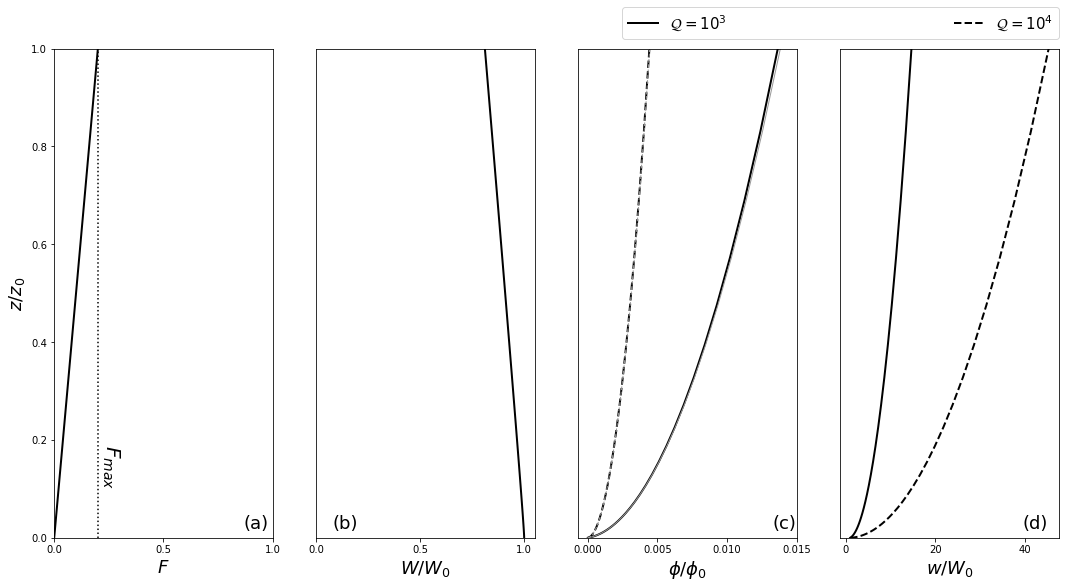

In [3]:
f, ax = plt.subplots(1, 4)
f.set_size_inches(18.0, 9.0)
f.set_facecolor('w')

n = 2
Fmax = 0.2
Q = np.asarray([1.e3, 1.e4])

z = np.logspace(-8., 0., 100)
phi = np.asarray([1. / 2. / qi * (np.sqrt(1. + 4 * z * Fmax * qi)-1) for qi in Q])
w = np.asarray([Fmax*z/phi_i for phi_i in phi])
W = np.asarray([(1.0 - Fmax*z)/(1.0 - phi_i) for phi_i in phi])

imphi = np.asarray([[fsolve(lambda f_: implicit_porosity(f_, Fmax*Z, qi, n), phi_ij)[0]
                    for Z, phi_ij in zip(z, phi_i)] for qi, phi_i in zip(Q, phi)])

ax[0].plot(z*Fmax, z, '-k', linewidth=2)
ax[0].plot([Fmax, Fmax], [0., 1.], ':k')
ax[0].set_xlabel(r'$F$', fontsize=18)
ax[0].set_xticks((0.0, 0.5, 1.0))
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(0.0, 1.0)
ax[0].set_ylabel(r'$z/z_0$', fontsize=18)
ax[0].set_yticks(np.arange(0.0, 1.1, 0.2))
ax[0].text(0.26, 0.1, r'$F_{max}$', fontsize=20, verticalalignment='bottom', 
           horizontalalignment='center', rotation=-90.0)
ax[0].text(0.98, 0.01, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax[1].plot(W[0, :], z, '-k', linewidth=2)
ax[1].set_xlabel(r'$W/W_0$', fontsize=18)
ax[1].set_xlim(0.0, 1.05)
ax[1].set_ylim(0.0, 1.0)
ax[1].set_xticks((0.0, 0.5, 1.0))
ax[1].set_yticks(())
ax[1].text(0.2, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

p1 = ax[2].plot(phi[0, :], z, '-k', linewidth=2)
p2 = ax[2].plot(phi[1, :], z, '--k', linewidth=2)
ax[2].plot(imphi[0, :], z, '-', linewidth=1, color=[0.6, 0.6, 0.6])
ax[2].plot(imphi[1, :], z, '--', linewidth=1, color=[0.6, 0.6, 0.6])
ax[2].set_xlabel(r'$\phi/\phi_0$', fontsize=18)
ax[2].set_xticks((0.0, 0.005, 0.01, 0.015))
ax[2].set_yticks(())
ax[2].set_ylim(0.0, 1.0)
ax[2].text(0.015,0.01, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.legend(handles=(p1[0], p2[0]), fontsize=15,
           labels=(r'$\mathcal{Q}=10^3$', r'$\mathcal{Q}=10^4$'),
           bbox_to_anchor=(-1.0, 1.02, 2., .2),  loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

ax[3].plot(w[0, :], z, '-k', linewidth=2)
ax[3].plot(w[1, :], z, '--k', linewidth=2)
ax[3].set_xlabel(r'$w/W_0$', fontsize=18)
ax[3].set_xticks((0.0, 20.0, 40.0))
ax[3].set_yticks(())
ax[3].set_ylim(0.0, 1.0)
ax[3].text(45., 0.01, '(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

In addition, 
__(a)__ The scaled porosity from equation \eqref{eq:meltcol-porosity-n2} as a function of column height with logarithmic axes. Narrow, dashed lines show asymptotic scalings $\por/\por_0 \sim F$ and $\por/\por_0\sim F^{1/\permexp}$. 

__(b)__ The _a posteriori_, non-dimensional compaction pressure, computed from the solution for $W(z),\phi(z)$ from \eqref{eq:meltcol-velocity-solution-W} and \eqref{eq:meltcol-porosity-n2}.

Two forms for the augmented compaction viscosity are considered: the black lines represent $\cmpvisc=\bulkvisc\propto\por^{-1}$; the gray lines represent $\cmpvisc=\bulkvisc\propto-\ln\por$.

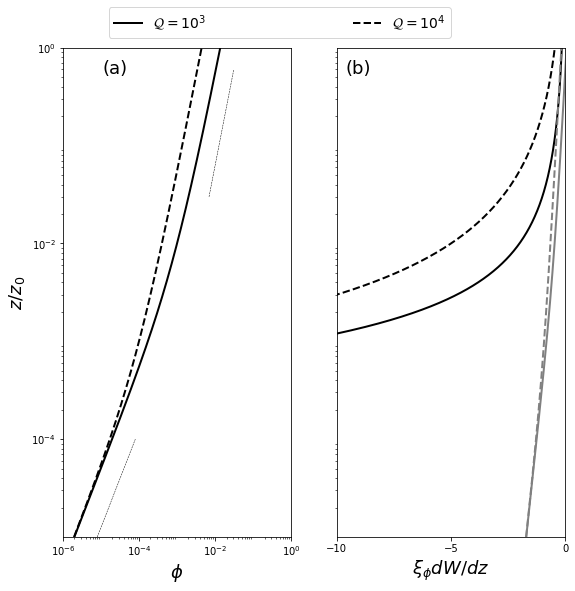

In [15]:
f, ax = plt.subplots(1, 2)
f.set_size_inches(9.0, 9.0)
f.set_facecolor('w')

n = 2
Fmax = 0.2
Q = np.asarray([1e3, 1e4])
zmin = 1e-5

z = np.logspace(np.log10(zmin), 0.0, 1000)
phi = np.asarray([0.5/qi*(np.sqrt(1+4*z*Fmax*qi) - 1.0) for qi in Q])

DP = np.asarray([-Fmax/(phi[0, :]/0.01),
                 -Fmax/(phi[1, :]/0.01),
                 -Fmax*(-np.log(phi[0, :]/0.01)),
                 -Fmax*(-np.log(phi[1, :]/0.01))])

zz = np.asarray([1e-5, 1e-4])
ff = zz * 0.8
zzz = np.asarray([3e-2, 6e-1])
fff = np.power(zzz, 1.0/n)/25.0

p1 = ax[0].loglog(phi[0, :], z, '-k', linewidth=2)
p2 = ax[0].loglog(phi[1, :], z, '--k', linewidth=2)
ax[0].loglog(ff, zz, '--k', linewidth=0.5)
ax[0].loglog(fff, zzz, '--k', linewidth=0.5)
ax[0].set_xlabel(r'$\phi$', fontsize=18)
ax[0].set_xlim((1e-6, 1.0))
ax[0].set_xticks((1e-6, 1e-4, 1e-2, 1.0))
ax[0].set_ylabel(r'$z/z_0$', fontsize=18)
ax[0].set_ylim((1e-5, 1.0))
ax[0].set_yticks((1e-4, 1e-2, 1e0))
ax[0].text(5e-5, 0.5, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')
plt.legend(handles=(p1[0], p2[0]), fontsize=14, labels=(r'$\mathcal{Q}=10^3$', r'$\mathcal{Q}=10^4$'),
           bbox_to_anchor=(-1.0, 1.02, 1.5, .2),  loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

ax[1].plot(DP[0, :], z, '-k', linewidth=2)
ax[1].plot(DP[1, :], z, '--k', linewidth=2)
ax[1].plot(DP[2, :], z, '-', linewidth=2, color=[0.5, 0.5, 0.5])
ax[1].plot(DP[3, :], z, '--', linewidth=2, color=[0.5, 0.5, 0.5])
ax[1].set_xlabel(r'$\xi_\phi dW/dz$', fontsize=18)
ax[1].set_xlim((-10., 0.0))
ax[1].set_xticks((-10, -5, 0))
ax[1].set_ylim((1e-5, 1.0))
ax[1].set_yscale('log')
ax[1].set_yticks(())
ax[1].text(-8.5, 0.5, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

### Thermodynamically consistent melting rate

In one-dimension and at steady state, the temperature equation can be simplified using the dimensional mass conservation equation

\begin{equation}
  \label{eq:col-energy-temperature}
  \density\heatcapacity W_0 \diff{\temp}{z} = -\left(\latent\Gamma + \density\expansivity W_0 g \temp\right).
\end{equation}

#### One component mantle column

For a one-component mantle, we define the maximum degree of melting as
\begin{equation}
  \label{eq:col-onecomp-Fmax}
  \Fmax^{1c} \equiv \frac{\density g/\clapeyron -  
    \expansivity g\soltemp_0/\heatcapacity}{\latent/\heatcapacity} z_0
\end{equation}

and the melting rate $\Gamma$ is approximated as

\begin{equation}
  \label{eq:col-onecomp-meltrate-Fmax}
  \Gamma \approx \density W_0 \Fmax^{1c}/z_0.
\end{equation}

The table below summarizes the simulation parameters

Quantity | &nbsp; &nbsp; &nbsp; value &nbsp; &nbsp; &nbsp; &nbsp; | unit
---      | :---:   | ---:
$\phi_0$ | 0.01  | ––
$z_0$    | 60    | km  
$\soltemp_0$ | 1650 | K
$\permexp$ |  2                      
$\density$| 3000 | kg/$m^3$
$\heatcapacity$ | 1200 | J/kg/K
$\expansivity$ | $3 \times 10^{-5}$ | $K^{-1}$
$\latent$ | $5 \times 10^{5}$ | J/kg
$\dFdT$ | $1/500$ | $K^{-1}$
$\clapeyron$ | $6.5 \times 10^6$ | Pa/K
$\soltemp_0$ | 1373 | K
$\potemp$ | 1623 | K

Figures below plot the solutions of the one-component melting column model with melting rate \eqref{eq:col-onecomp-meltrate-Fmax}. __(a)__ Temperature. The slope of this curve is $-\rho g/\clapeyron$. __(b)__ Degree of melting with $\Fmax^{1c}$ as given in \eqref{eq:col-onecomp-Fmax}. __(c)__ Scaled porosity from \eqref{eq:meltcol-porosity-n2}.

In [ ]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(12.0, 9.0)
f.set_facecolor('w')

z0 = 60e3  # column height, metres
c = 1200.  # heat capacity
alpha = 3e-5  # expansivity
rho = 3000.  # density
g = 10.  # gravity
L = 5e5  # latent heat J/kg
C = 6.5e6  # clapeyron Pa/K
TsP0 = 1100. + 273.  # solidus at P=0
Tsz0 = TsP0 + rho*g*z0/C

n = 2
Q = np.asarray([1e3, 1e4])
z = np.linspace(0., 1., 1000, endpoint=False)
Fmax = g*z0*rho*c/C/L*(1.-alpha*C*Tsz0/rho/c)
T = 1 - rho*g*z0*z/C/Tsz0

phi = np.asarray([0.5/qi * (np.sqrt(1. + 4.*z*Fmax*qi) - 1.0) for qi in Q])

ax[0].plot(T, z, '-k', linewidth=2)
ax[0].set_xlabel(r'$T/T^\mathcal{S}_0$', fontsize=18)
ax[0].set_ylabel(r'$z/z_0$', fontsize=18)
ax[0].set_ylim(0.0, 1.0)
ax[0].set_yticks(np.arange(0.0, 1.01, 0.2))
ax[0].text(0.85, 0.01, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax[1].plot(Fmax*z, z, '-k', linewidth=2)
ax[1].plot([Fmax, Fmax], [0.0, 1.0], ':k')
ax[1].set_xlabel(r'$F$', fontsize=18)
ax[1].set_xlim(0.0, 1.0)
ax[1].set_ylim(0.0, 1.0)
ax[1].text(Fmax+0.07, 0.1, r'$F_{max}^{1c}$', fontsize=20, verticalalignment='bottom',
           horizontalalignment='center', rotation=-90)
ax[1].text(0.9, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

p1 = ax[2].plot(phi[0, :], z, '-k', linewidth=2)
p2 = ax[2].plot(phi[1, :], z, '--k', linewidth=2)
ax[2].set_xlabel(r'$\phi/\phi_0$', fontsize=18)
ax[2].set_xlim(0.0, 0.03)
ax[2].set_xticks(())
ax[2].set_ylim(0.0, 1.0)
ax[2].text(2.9, 0.01, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.legend(handles=(p1[0], p2[0]), fontsize=14, labels=(r'$v_r =0.01$', r'$v_r =0.1$'),
           bbox_to_anchor=(-1.0, 1.02, 1.5, .2),  loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

plt.plot()

[]

#### Two-component mantle column

In this case, the melting rate $\Gamma$ reads

\begin{equation}
  \label{eq:col-twocomp-Gamma}
  \Gamma \approx \density W_0 \frac{\density g\clapeyron^{-1} - \expansivity
  g \soltemp_0/\heatcapacity}{\solslope\Delta\con + \latent/\heatcapacity},
\end{equation}

The simulation parameters are summarized below:

Quantity | &nbsp; &nbsp; &nbsp; value &nbsp; &nbsp; &nbsp; &nbsp; | unit
---      | :---:   | ---:
$\solslope\Delta\con$ | 700 | $K$
$\phi_0$ | 0.01  | ––
$z_0$ | 60 | km
$\soltemp_0$ | 1650 | K
$\permexp$ |  2 | ––
$\density$| 3000 | kg/$m^3$
$\heatcapacity$ | 1200 | J/kg/K
$\expansivity$ | $3 \times 10^{-5}$ | $K^{-1}$
$\latent$ | $5 \times 10^{5}$ | J/kg
$\dFdT$ | $1/500$ | $K^{-1}$
$\clapeyron$ | $6.5 \times 10^6$ | Pa/K
$\soltemp_0$ | 1373 | K
$\potemp$ | 1623 | K

Figures below plot the solutions of the two-component, batch-melting column model with melting rate \eqref{eq:col-twocomp-Gamma}. __(a)__ Temperature. Dotted line shows the Clausius-Clapeyron slope $-\rho g/\clapeyron$. \textbf{(b)} Scaled porosity. __(c)__ Scaled bulk composition.

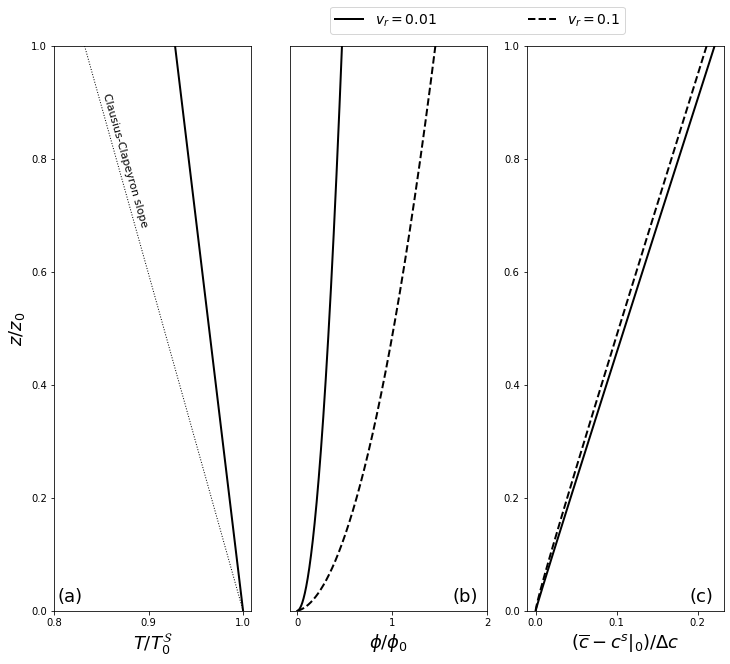

In [6]:
f, ax = plt.subplots(1, 3)
zoom = 2.0
f.set_size_inches(6.0 * zoom, 5.2 * zoom)
f.set_facecolor('w')

z0 = 60e3  # column height, metres
c = 1200.  # heat capacity
alpha = 3e-5  # expansivity
rho = 3000.  # density
g = 10.  # gravity
L = 5e5  # latent heat J/kg
C = 6.5e6  # clapeyron Pa/K
Mdc = 700.  # sol slope times Delta c, K
TsP0 = 1100. + 273.  # solidus at P=0
Tsz0 = TsP0 + rho*g*z0/C

Fmax = rho*g*z0/L*(c/C - alpha/rho*Tsz0)/(1+c*Mdc/L)

n = 2
phi0 = 0.01
epsilon = np.asarray([0.01, 0.1])

z = np.linspace(0,1,1000)
F = Fmax * z
W = 1. - F
T = 1. - rho*g/C*z0/Tsz0*z + Mdc*F/Tsz0
Tcc = 1. - rho*g/C*z0/Tsz0*z

phi = np.asarray([epsi/2.*(np.sqrt(1. + 4.*Fmax*z/epsi/phi0) - 1.) for epsi in epsilon])
Cb = np.asarray([F - phi0*phii for phii in phi])

ax[0].plot(T, z, '-k', linewidth=2)
ax[0].plot(Tcc, z,':k', linewidth=1)
ax[0].set_xlabel(r'$T/T^\mathcal{S}_0$', fontsize=18)
ax[0].set_xticks((0.8, 0.9, 1.0))
ax[0].set_ylabel(r'$z/z_0$', fontsize=18)
ax[0].set_yticks(np.arange(0.0, 1.1, 0.2))
ax[0].set_ylim(0.0, 1.0)
ax[0].text(0.85, 0.68, r'Clausius-Clapeyron slope', fontsize=11, horizontalalignment='left', rotation=-74)
ax[0].text(0.83, 0.01, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

p1 = ax[1].plot(phi[0, :], z, '-k', linewidth=2)
p2 = ax[1].plot(phi[1, :], z, '--k', linewidth=2)
ax[1].set_xlabel(r'$\phi/\phi_0$', fontsize=18)
ax[1].set_xticks((0, 1, 2))
ax[1].set_yticks(())
ax[1].set_ylim(0.0, 1.0)
ax[1].text(1.9, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.legend(handles=(p1[0], p2[0]), fontsize=14, labels=(r'$v_r = 0.01$', r'$v_r = 0.1$'),
           bbox_to_anchor=(-1.0, 1.02, 1.5, .2),  loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

ax[2].plot(Cb[0, :], z, '-k', linewidth=2)
ax[2].plot(Cb[1, :], z, '--k', linewidth=2)
ax[2].set_xlabel(r'$(\overline{c}-c^{s}\vert_0)/\Delta c$', fontsize=18)
ax[2].set_ylim(0.0, 1.0)
ax[2].set_xticks((0.0, 0.1, 0.2))
ax[2].set_yticks(np.arange(0.0, 1.1, 0.2))
ax[2].set_ylim(0.0, 1.0)
ax[2].text(0.22, 0.01, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

#### Two-component column with an incompatible component
    
The normalized volatile concentration in the solid is given by

\begin{equation}
  \label{eq:col-twocomp-vol-nonlinear-cs-solution}
  \con\sol(z) = \frac{1}{2}\left[\coninflow - \frac{A_1}{\coninflow} +
    A_2z + \sqrt{4A_1 + \left(A_2z + \coninflow - 
        \frac{A_1}{\coninflow}\right)^2}\right].
\end{equation}

The degree of melting as a function of the height is given by

\begin{equation}
  \label{eq:col-twocomp-vol-nonlinear-F-solution}
   F = \frac{\heatcapacity}{\latent}\left[\left(\frac{\density g}
   {\clapeyron} - \frac{\expansivity g \soltemp_0}{\heatcapacity}\right)z + \solslope\left(\coninflow - \con\sol\right)\right].
\end{equation}

Temperature as a function of height in the melting column is given by

\begin{equation}
\label{eq:col-twocomp-pd-solidus}
\soltemp = \soltemp_\text{ref} + (\pres-\pres_\text{ref})/\clapeyron  +
           \solslope\left(\equi\con\sol - \equi\con\sol_{\text{ref}}\right)
\end{equation}

The simulation parameters are summarized below:

Quantity | &nbsp; &nbsp; &nbsp; value &nbsp; &nbsp; &nbsp; &nbsp; | unit
---      | :---:   | ---:
$\solslope$ | -4 | K/ppm
$\coninflow{}$ | 100 | ppm
$\por_0$ | 0.01 | –– 
$\velratio$ | 0.01 | ––
$\phi_0$ | 0.01  | ––
$z_0$    | 60    | km  
$\soltemp_0$ | 1650 | K
$\permexp$ |  2 | ––              
$\density$| 3000 | kg/$m^3$
$\heatcapacity$ | 1200 | J/kg/K
$\expansivity$ | $3 \times 10^{-5}$ | $K^{-1}$
$\latent$ | $5 \times 10^{5}$ | J/kg
$\dFdT$ | $1/500$ | $K^{-1}$
$\clapeyron$ | $6.5 \times 10^6$ | Pa/K
$\soltemp_0$ | 1373 | K
$\potemp$ | 1623 | K

Figures below plot the solution of the two-component melting column model with a volatile component. The onset of melting is marked by a red circle in each panel. The bottom of the column $z=0$ corresponds to a depth of 130 km and $\soltemp_0=1300^\circ$C. __(a)__ The normalised volatile concentration in the solid from equation \eqref{eq:col-twocomp-vol-nonlinear-cs-solution}. __(b)__ Degree of melting as a function of height, computed according to equation \eqref{eq:col-twocomp-vol-nonlinear-F-solution}. __(c)__ Temperature as a function of height in the melting column, obtained from the solidus relation \eqref{eq:col-twocomp-pd-solidus}. __(d)__ Porosity computed according to the approximate Darcy solution \eqref{eq:meltcol-porosity-n2} for $\permexp=2$.

/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


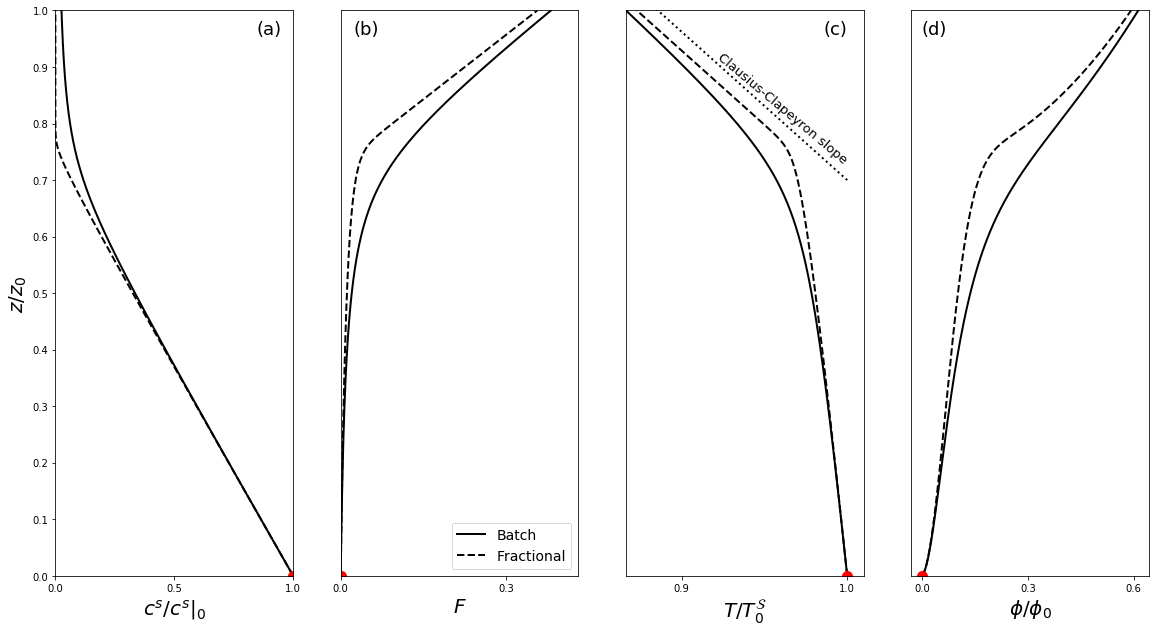

In [7]:
f, ax = plt.subplots(1, 4)
zoom = 2.0
f.set_size_inches(9.8 * zoom, 5.2 * zoom)
f.set_facecolor('w')

D = 0.01  # distribution coefficient
c = 1200.  # heat capacity J/kg/K
alpha = 3e-5  # expansivity /K
rho = 3000.  # density
g = 10.  # gravity
L = 5e5  # latent heat J/kg
C = 6.5e6  # clapeyron Pa/K
M = -4.  # solidus slope, K per ppm volatile
c0 = 100.  # volatile concentration, ppm
TsP0 = 1100. + 273.  # solidus at P=0
Ts0 = 1300. + 273.  # mantle temperature
phi0 = 0.01  # reference porosity
epsilon = 0.01  # melt/solid speed ratio
n = 2.  # permeability exponent

Mc0 = M*c0
z0 = (Ts0 - TsP0 - Mc0)/(rho*g/C)

z = np.linspace(0.0, z0, 300)
Tcc = Ts0 - rho*g/C*z

A1 = L*c0/c/M/(1.-1./D)
A2 = -g/M*(alpha*Ts0/c - rho/C)
cs = 0.5*(c0 - A1/c0 + A2*z + np.sqrt(4.*A1 + (A2*z + c0 - A1/c0)**2))
F = c/L*(rho*g*z/C + M*(c0-cs) - alpha*g*Ts0*z/c)
T = Ts0 - rho*g*z/C + M*(cs-c0)
phi = epsilon/2.*(np.sqrt(1 + 4*F/epsilon/phi0) - 1.)

a = (1/D - 1)*c*M/L
beta = -g*rho/(M*C) + alpha*g*Ts0/(c*M)

cf =  -lambertw((-c0)*a*np.exp((-c0)*a)*np.exp(a*beta*z))/a  # Lambert W approximation
Ff = c/L*(rho*g*z/C + M*(c0-cf) - alpha*g*Ts0*z/c)
Tf = Ts0 - rho*g*z/C + M*(cf-c0)
phif = epsilon/2*(np.sqrt(1 + 4*Ff/epsilon/phi0) - 1)

ax[0].plot(cs/c0, z/z0, '-k', linewidth=2)
ax[0].plot(cf/c0, z/z0, '--k', linewidth=2)
ax[0].plot(1., 0., 'or', markersize=10)
ax[0].set_xlabel(r'$c^s/c^s\vert_0$', fontsize=20)
ax[0].set_ylabel(r'$z/z_0$', fontsize=20)
ax[0].set_xlim(0.0, 1.0)
ax[0].set_xticks((0.0, 0.5, 1.0))
ax[0].set_ylim(0.0, 1.0)
ax[0].set_yticks(np.arange(0.0, 1.01, 0.1))
ax[0].text(0.95, 0.95, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

p1, = ax[1].plot(F, z/z0, '-k', linewidth=2, label='Batch')
p2, = ax[1].plot(Ff, z/z0, '--k', linewidth=2, label='Fractional')
ax[1].plot(0.0, 0.0, 'or', markersize=10)
ax[1].set_xlim(0.0, np.amax(F)+0.05)
ax[1].set_xticks((0.0, 0.3))
ax[1].set_xlabel(r'$F$', fontsize=20)
ax[1].set_ylim(0.0, 1.0)
ax[1].set_yticks(())
ax[1].legend(handles=[p1, p2], fontsize=14, loc='lower right')
ax[1].text(0.07, 0.95, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax[2].plot(T/Ts0, z/z0, '-k', linewidth=2)
ax[2].plot(Tf/Ts0,z/z0,'--k', linewidth=2)
ax[2].plot(1.0, 0.0, 'or', markersize=10)
ax[2].plot(Tcc/Ts0, z/z0 + 0.70, ':k', linewidth=2)
ax[2].set_xlabel(r'$T/T^\mathcal{S}_0$', fontsize=20)
ax[2].set_xlim(np.amin(T/Ts0), 1.01)
ax[2].set_xticks((0.9, 1.0))
ax[2].set_ylim(0.0, 1.0)
ax[2].set_yticks(())
ax[2].text(0.92, 0.73, r'Clausius-Clapeyron slope', fontsize=13, horizontalalignment='left', rotation=-40)
ax[2].text(1.0, 0.95, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

ax[3].plot(phi, z/z0, '-k', linewidth=2)
ax[3].plot(phif, z/z0, '--k', linewidth=2)
ax[3].plot(0.0, 0.0, 'or', markersize=10)
ax[3].set_xlabel(r'$\phi/\phi_0$', fontsize=20)
ax[3].set_xticks((0.0, 0.3, 0.6))
ax[3].set_ylim(0.0, 1.0)
ax[3].set_yticks(())
ax[3].text(0.07, 0.95, '(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

## The visco-gravitational boundary layer

The solid upwelling rate is given by 

\begin{equation}
  \label{eq:col-cmp-boundary-solidvel}
  W \sim 1 + \frac{\Fmax \cmppres_b}{2\por_0}z^2,
\end{equation}

The dimensionless, time-dependent governing equations are
\begin{align}
    \label{eq:tdcol-mechanics-compaction-nd}
    \frac{\velratio}{\por_0}(1-W) &= \por^\permexp
    \left[1 - \delta^2\frac{\velratio}{\por_0} \pdiff{}{z}\frac{1}{\por}\pdiff{W}{z}\right],\\
    \label{eq:tdcol-mechanics-porosity-nd}
    \pdiff{\por}{t} + W\diff{\por}{z} &= \frac{1}{\por_0}
    \left(\Fmax + \pdiff{W}{z}\right).
\end{align}

The dimensionless compaction pressure is defined as 

\begin{equation}
\label{eq:tdcol-compac-pres}
\cmppres = \bulkvisc\infd W/\infd z
\end{equation}

Table below summarizes the simulation parameters

Quantity | value &nbsp;  &nbsp; 
--- | ---
$\cmplength$ | $0.1$
$\velratio$ | $0.01$
$\por_0$ | $0.01$
$\permexp$ | 2 
$\Fmax$ | 0.225
$z_b$ | $z_0/100$
$\cmpvisc$ | $\por^{-1}$

Figures below plot the numerical solution (of the system \eqref{eq:tdcol-mechanics-compaction-nd}-\eqref{eq:tdcol-mechanics-porosity-nd}, discretised by finite differences and run to steady state), along with Darcy, and boundary layer solutions to the one-dimensional melting column with constant adiabatic productivity. The domain is limited to $0\le z \le 2z_b$. __(a)__ Solid upwelling rate, equation \eqref{eq:col-cmp-boundary-solidvel}. __(b)__ Compaction pressure, equation \eqref{eq:tdcol-compac-pres}, non-dimensionalised by $\cmppres_0 = \xi_0W_0/z_0$. __(c)__ Porosity.

In [8]:
def AssembleMatrix_W(aw, dz, phi, n, d0):
    zh = 1./(0.5*(phi[0:-1] + phi[1:]))  # bulk viscosity
    b = np.power(phi[1:-1], n)
    aw.data[0] = np.concatenate((b*zh[0:-1], -1.0, 0.0), axis=None)
    aw.data[1] = np.concatenate((1.0, -(b*(zh[0:-1]+zh[1:]) + dz*dz/d0/d0), 1.0), axis=None)
    aw.data[2] = np.concatenate((0.0, 0.0, b*zh[1:]), axis=None)


def AssembleRHS_W(dz, phi, w, d0, f0, e0, n, F0):
    return np.concatenate((w[0], dz*dz/d0/d0*(f0/e0*(phi[1:-1] ** n) - 1), -F0*dz), axis=None)


def AssembleMatrix_phi(Ap, W, dt, dz):
    dtzW = 0.5*dt/dz*W[1:]
    Ap.data[0] = np.concatenate((-dtzW, 0.0), axis=None)
    Ap.data[1] = np.concatenate((1.0, dtzW + 1.0), axis=None)


def AssembleRHS_phi(z, phi, W, dz, F0, f0, dt):
    cmp = np.gradient(W, z)
    cmp_F0 = np.concatenate((cmp[1:-1], -F0), axis=None)
    phidot = -W[1:] * (phi[1:]-phi[0:-1])/dz/2. + (F0 + cmp_F0)/f0
    return np.concatenate((phi[0], dt * phidot + phi[1:]), axis=None)


def MeltingColNumerical(f0, e0, d0, F0, n):
    # asymptotic solution for non-compacting boundary layer
    zb = e0 / f0 / F0 * np.power(d0 ** 2 * F0 ** 2 / n, n / (n + 1))
    P0 = - f0 * zb / d0 ** 2 / e0 - F0 * (1 - F0 * zb) / np.power(f0 / e0 * F0 * zb, 1./n)
    zd = np.linspace(0.0, zb, 10000)
    phid = F0 / f0 * zd
    Wd = 1 + F0 * P0 / 2 / f0 * zd ** 2
    Pd = f0 / (d0 ** 2) / e0 * zd + P0

    # domain is four times the estimated boundary layer thickness
    z = np.linspace(0.0, 4. * zb, 5000)
    dz = z[1] - z[0]
    phi_t0 = np.power(e0 * F0 / f0 * z, 1./n)  # Darcy solution
    W_t0 = 1 - F0 * z  # Darcy solution

    # allocate matrices and solution vectors
    N = len(z)
    AW = sp.diags([-1.0, 1.0, 2.0], [-1, 0, 1], shape=(N, N))
    Ap = sp.diags([-1.0, 1.0], [-1, 0], shape=(N, N))
    phi = phi_t0
    W = W_t0

    dt = 0.5 * dz
    tol = 1e-2
    del_ = 1.0

    while del_ > tol:
        phio = phi
        AssembleMatrix_W(AW, dz, 0.5 * (phio + phi), n, d0)
        R = AssembleRHS_W(dz, 0.5 * (phio + phi), W, d0, f0, e0, n, F0)
        W = spsolve(AW.tocsr(), R)  # compaction equation

        AssembleMatrix_phi(Ap, W, dt, dz)
        R = AssembleRHS_phi(z, phio, W, dz, F0, f0, dt)
        phi = spsolve(Ap.tocsr(), R)  # porosity evolution

        # if change of solution is smaller than tolerance, break
        del_ = np.linalg.norm(phi - phio, 2) / dt / np.linalg.norm(phi, 2)  # change of solution

    return z, W, phi, np.gradient(W, z) / phi

/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


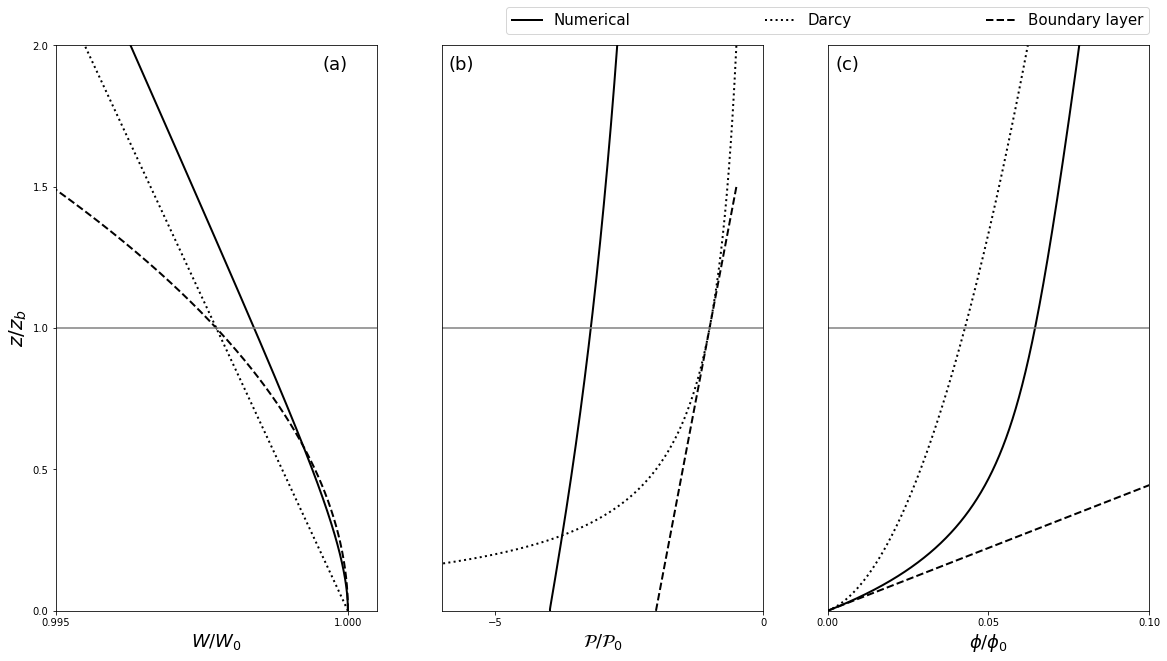

In [9]:
f, ax = plt.subplots(1, 3)
zoom = 2.0
f.set_size_inches(9.8 * zoom, 5.2 * zoom)
f.set_facecolor('w')

delta = 0.1
vr = 0.01
phi0 = 0.01
Fmax = 0.225

zb = delta*np.sqrt(vr)
P0 = -2.0 * phi0/zb

Z = np.linspace(0.0, 2.0, 1000)  # this is z/zb;

S_z, S_W, S_phi, S_P = MeltingColNumerical(phi0, vr, delta, Fmax, 2)

Pbl = np.asarray([-phi0/delta/np.sqrt(vr)*(2-z) if z<=1.5 else np.nan for z in Z])
P   = -phi0/(zb*Z)

Wbl = np.asarray([1. + Fmax*P0/2./phi0*(zb*z)**2 if z <= 1.5 else np.nan for z in Z])
W   = 1.0 - Fmax*(zb*Z)

phibl = np.asarray([Fmax/phi0*zb*z if z <= 1.5 else np.nan for z in Z])
phi = vr/2.*(np.sqrt(1.0 + 4.0*Fmax*zb*Z/vr/phi0) - 1.0)

ax[0].plot(W, Z, ':k', linewidth=2)
ax[0].plot(Wbl, Z, '--k', linewidth=2)
ax[0].plot(S_W, S_z/zb,'-k', linewidth=2)
ax[0].plot([0.0, 2], [1.0, 1.0], '-', color=[0.5, 0.5, 0.5])
ax[0].set_xlim(0.995, 1.0005)
ax[0].set_xticks((0.995, 1.0))
ax[0].set_ylim(0.0, 2.0)
ax[0].set_yticks((0.0, 0.5, 1.0, 1.5, 2.0))
ax[0].set_xlabel(r'$W/W_0$', fontsize=18)
ax[0].set_ylabel(r'$z/z_b$', fontsize=20)
ax[0].text(1.0, 1.9, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

p0, = ax[1].plot(S_P, S_z/zb, '-k', linewidth=2)
p1, = ax[1].plot(P, Z, ':k', linewidth=2)
p2, = ax[1].plot(Pbl, Z, '--k', linewidth=2)
ax[1].plot([-10.0, 2.0], [1.0, 1.0], '-', color=[0.5, 0.5, 0.5])
ax[1].set_xlim(-6.0, 0.0)
ax[1].set_xticks((-5., 0.))
ax[1].set_ylim(0.0, 2.0)
ax[1].set_yticks(())
ax[1].set_xlabel(r'$\mathcal{P}/\mathcal{P}_0$', fontsize=18)
ax[1].text(-5.4, 1.9, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.legend(handles=[p0, p1, p2], labels=['Numerical', 'Darcy', 'Boundary layer'], fontsize=15,
           bbox_to_anchor=(-1.0, 1.02, 2.0, .2),  loc='lower left', ncol=3, mode="expand", borderaxespad=0.)

ax[2].plot(phi, Z, ':k', phibl, Z, '--k', S_phi, S_z/zb, '-k', linewidth=2)
ax[2].plot([0.0, 2.0,], [1.0, 1.0], '-', color=[0.5, 0.5, 0.5])
ax[2].set_xlim(0.0, 0.1)
ax[2].set_xticks((0.0, 0.05, 0.1))
ax[2].set_ylim(0.0, 2.0)
ax[2].set_yticks(())
ax[2].set_xlabel(r'$\phi/\phi_0$', fontsize=18)
ax[2].text(0.01, 1.9, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

## The decompaction boundary layer

The porosity profile is given by
\begin{equation}
  \label{eq:decmp_porosity}
  \frac{\por}{\por_0} =
  \left[\frac{1-G(z/\freezelength)}{1-R^2G''(z/\freezelength)}\right]^{1/n},
\end{equation}
where $R = \cmplength_0/\freezelength$ is the ratio of the compaction length to
the length-scale over which freezing occurs.

The shape function $G(\zeta)$ and its derivatives that can be used to evaluate equation \eqref{eq:decmp_porosity} are defined as
\begin{align}
    \label{eq:shape_function_tanh-G}
    G(\zeta) &= \frac{1}{\ln 2}\left[\zeta + \ln(\cosh\zeta)\right]+1,\\
    \label{eq:shape_function_tanh-Gp}
    G'(\zeta) &= \frac{1}{\ln 2}(1 + \tanh \zeta),\\
    \label{eq:shape_function_tanh-Gpp}
    G''(\zeta) &= \frac{1}{\ln 2}\text{sech}^2\zeta.
\end{align}

The normalised liquid upwelling speed is derived from 
\begin{equation}
  \label{eq:decmp_intro_G}
  \por w \equiv q_\infty\left[1 - G(z/\freezelength)\right],
\end{equation}
where $\freezelength$ is a length-scale over which freezing occurs.

The normalised solid upwelling speed $W(z)/W_0$ is given by
\begin{equation}
  \label{eq:decomp_col_solid_vel}
  \frac{W}{W_0} = 1 - \frac{q_\infty}{W_0}\left[1-G(z/\freezelength)\right].
\end{equation}

Figures below plot the decompaction column. __(a)__ Quantities $G$, $G'$ and $G''$ as given by equations \eqref{eq:shape_function_tanh-G}, \eqref{eq:shape_function_tanh-Gp} and \eqref{eq:shape_function_tanh-Gpp}, respectively. __(b)__ The normalised porosity computed with equation \eqref{eq:decmp_porosity} for various values of $R=\cmplength_0/\freezelength$. __(c)__ Normalised liquid upwelling speed for various values of $R$. __(d)__ Normalised solid upwelling speed, equation \eqref{eq:decomp_col_solid_vel}, for various flux ratios $q_\infty/W_0$.

/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


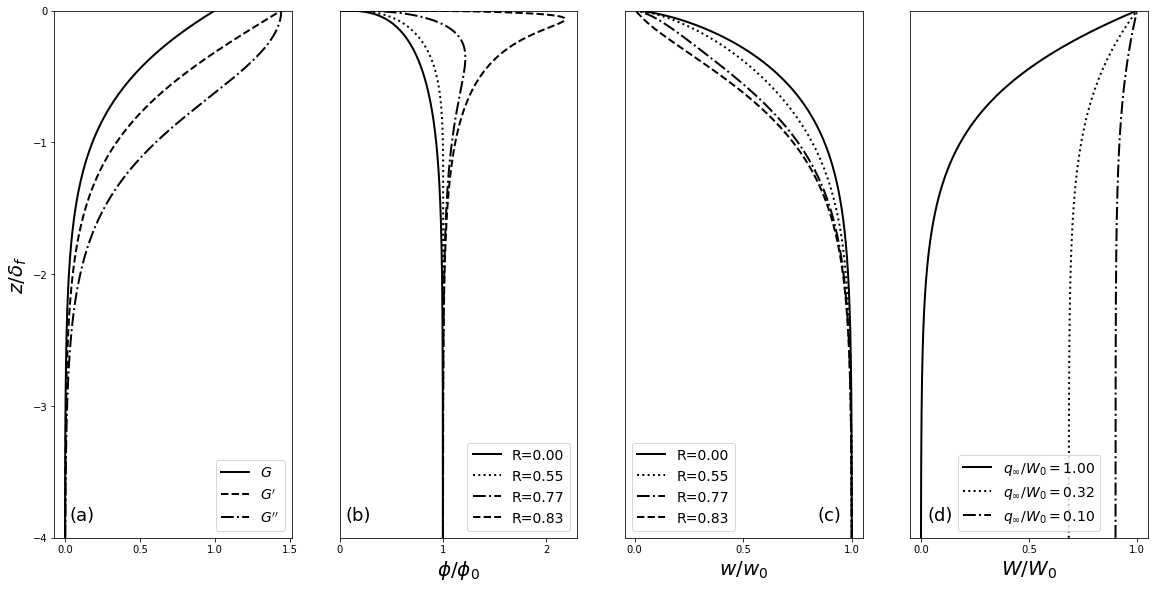

In [10]:
f, ax = plt.subplots(1, 4)
zoom = 2.0
f.set_size_inches(9.8 * zoom, 4.85 * zoom)
f.set_facecolor('w')

R2 = np.asarray([0.0, 0.3, 0.6, 0.69], dtype=np.float)
fovr = 0.01/np.logspace(-2.0, -1.0, 3)
n = 3

zeta = np.linspace(-4.0, 0.0, 1000)
A = 1.5
G   = (zeta + np.log(2) + np.log(np.cosh(zeta)))/np.log(2)
Gp  = (1 + np.tanh(zeta))/np.log(2)
Gpp = 1./(np.cosh(zeta)**2 * np.log(2))
Phi = np.asarray([np.power((1-G)/(1-R2i*Gpp), 1./n) for R2i in R2])
w = np.asarray([(1-G)/Phii for Phii in Phi])
W = np.asarray([1 - fovri*(1-G) for fovri in fovr])

ax[0].plot(G, zeta, '-k', linewidth=2, label=r'$G$')
ax[0].plot(Gp, zeta, '--k', linewidth=2, label=r'$G^\prime$')
ax[0].plot(Gpp, zeta, '-.k', linewidth=2, label=r'$G^{\prime\prime}$')
ax[0].set_ylim(-4.0, 0.0)
ax[0].set_ylabel(r'$z/\delta_f$', fontsize=20)
ax[0].set_xticks((0.0, 0.5, 1.0, 1.5))
ax[0].set_yticks((-4, -3, -2, -1, 0))
ax[0].legend(loc='lower right', fontsize=14)
ax[0].text(0.2, -3.9, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')
                    
for Phii, pltstyi, R2i in zip(Phi, {':k','-.k','--k','-k'}, np.sqrt(R2)):
    ax[1].plot(Phii, zeta, pltstyi, linewidth=2, 
               label="R={0:.2f}".format(R2i))
ax[1].set_xlim(0.0, 2.3)
ax[1].set_ylim(-4.0, 0.0)
ax[1].set_xticks((0.0, 1.0, 2.0))
ax[1].set_yticks(())
ax[1].set_xlabel(r'$\phi/\phi_0$', fontsize=20)
ax[1].legend(loc='lower right', fontsize=14)
ax[1].text(0.3, -3.9, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

for wi, pltstyi, R2i in zip(w, {':k','-.k','--k','-k'}, np.sqrt(R2)):
    ax[2].plot(wi, zeta, pltstyi, linewidth=2, label="R={0:.2f}".format(R2i))
ax[2].set_xlabel(r'$w/w_0$', fontsize=20)
ax[2].set_ylim(-4.0, 0.0)
ax[2].set_xticks((0.0, 0.5, 1.0))
ax[2].set_yticks(())
ax[2].legend(loc='lower left', fontsize=14)
ax[2].text(0.95, -3.9, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

for Wi, pltstyi, fovri in zip(W, {':k','-.k','--k','-k'}, fovr):
    ax[3].plot(Wi, zeta, pltstyi, linewidth=2, label="$q_\infty/W_0={0:.2f}$".format(fovri))
ax[3].set_yticks(())
ax[3].set_ylim(-4.0, 0.0)
ax[3].set_xticks((0.0, 0.5, 1.0))
ax[3].set_xlabel('$W/W_0$', fontsize=20)
ax[3].legend(loc='lower center', fontsize=14)
ax[3].text(0.15, -3.9, '(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

## Isotopic decay-chain disequilibria in a melting column

### Constant transport rates

The low transport regime is given by

\begin{equation}
  \label{eq:const-coltop-slow-approx}
  \inact\liq_2\vert_1 \sim \frac{\pormax + \dico_1}{\pormax + \dico_2},\;\;\;\;\;\;\;\;\;\;\;\;
  \inact\liq_3\vert_1 \sim \frac{\pormax + \dico_1}{\pormax + \dico_3},
\end{equation}
while the fast transport regime is given by
\begin{equation}
  \label{eq:const-coltop-fast-transport}
  \inact\liq_2\vert_1 \sim 1 +
  \frac{\deco_2z_0}{W_0\Fmax}\left(\dico_{1} - \dico_2\right),\;\;\;\;\;\;\;\;\;\;\;\;
  \inact\liq_3\vert_1 \sim 1 +
  \frac{\deco_3z_0}{W_0\Fmax}\left(\dico_{2} - \dico_3\right).  
\end{equation}

Figure below plots the ingrowth factors at the top of the column, with the following parameters

Parameters | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; value &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | unit
--- | --- | ---
$\Fmax$ | 0.2 | ––
$z_0$ | 60 | km
$D_1$ | $10^{-2}$ | ––
$D_2$ | $5\times10^{-3}$ | ––
$D_3$ | $5\times10^{-4}$ | ––
$\deco_2$ | $10^{-5}$ | yr$^{-1}$
$\deco_3$ | $10^{-4}$ | yr$^{-1}$

__(a)__ Slow transport regime, computed with equations \eqref{eq:const-coltop-slow-approx}. 
__(b)__ Fast transport regime, computed with equations \eqref{eq:const-coltop-fast-transport}.

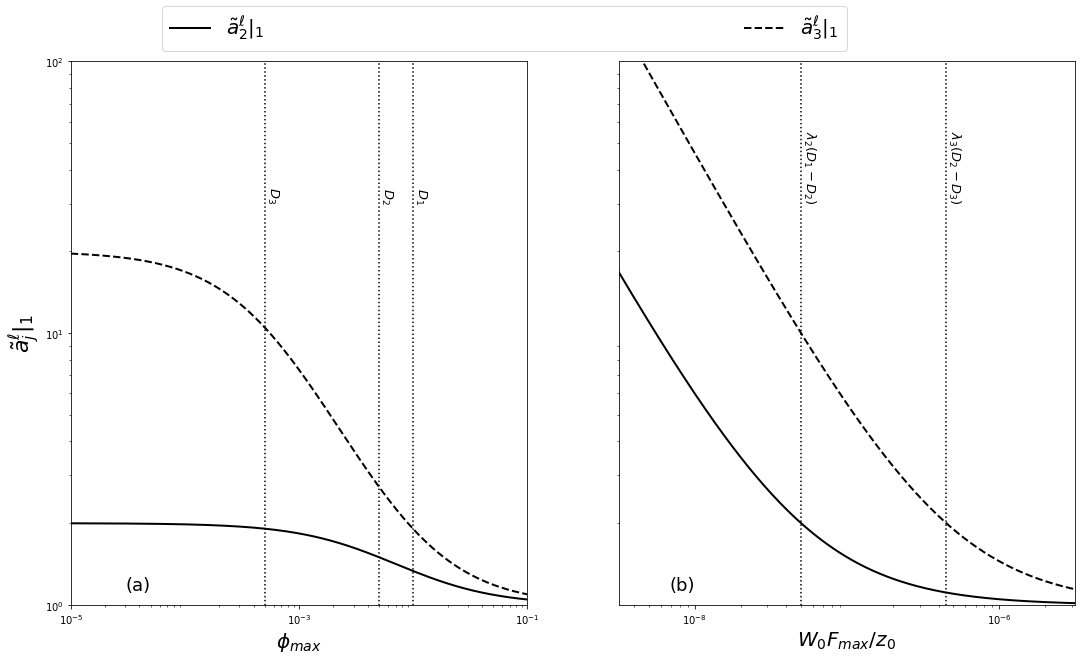

In [17]:
f, ax = plt.subplots(1, 2)
zoom = 2.0
f.set_size_inches(9. * zoom, 5. * zoom)
f.set_facecolor('w')

fmax = np.logspace(-5.0, 0.0, 1000)
D = np.asarray([1e-2, 0.5e-2, 0.5e-3])
al2s = (fmax+D[0])/(fmax+D[1])
al3s = (fmax+D[0])/(fmax+D[2])

z0 = 60e3  # meters
W0 = np.logspace(-2.0, 2.0, 1000)*1e-2  # meters/year
Fmax = 0.2
lmbda = np.asarray([1.0, 1e-5, 1e-4])  # per year

al2f = 1.0 + lmbda[1]*z0/W0/Fmax*(D[0]-D[1])
al3f = 1 + lmbda[2]*z0/W0/Fmax*(D[1]-D[2])

p0, = ax[0].loglog(fmax, al2s, '-k', linewidth=2)
p1, = ax[0].loglog(fmax, al3s, '--k', linewidth=2)
for i, Di in enumerate(D):
    ax[0].plot([Di, Di], [1e-10, 1e10], ':k')
    ax[0].text(Di, 30., r"$D_{0}$".format(i+1), fontsize=13, rotation=-90, verticalalignment='bottom')
ax[0].set_ylim(1e0, 1e2)
ax[0].set_xlim(1e-5, 1e-1)
ax[0].set_xticks((1e-5, 1e-3, 1e-1))
ax[0].set_xlabel(r'$\phi_{max}$', fontsize=20)
ax[0].set_ylabel(r'$\tilde{a}_j^\ell\vert_1$', fontsize=22)
ax[0].text(5e-5, 1.1e0, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')
plt.legend(handles=[p0, p1], labels=[r'$\tilde{a}_2^\ell\vert_1$', r'$\tilde{a}_3^\ell\vert_1$'], fontsize=20,
           bbox_to_anchor=(-1.0, 1.02, 1.5, .2),  loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

ax[1].loglog(W0*Fmax/z0, al2f, '-k', W0*Fmax/z0, al3f, '--k', linewidth=2)
for (i, lmbdai), x in zip(enumerate(lmbda[1:]), D[0:-1] - D[1:]):
    ax[1].plot([lmbdai*x, lmbdai*x], [1e-10, 1e10], ':k')
    ax[1].text(lmbdai*x, 30., '$\lambda_{0}(D_{1}-D_{2})$'.format(i+2,i+1,i+2), 
               fontsize=13, rotation=-90, verticalalignment='bottom')
ax[1].set_ylim(1e0, 1e2)
ax[1].set_xlim(np.power(10, -8.5), np.power(10, -5.5))
ax[1].set_yticks(())
ax[1].set_xticks((1e-8, 1e-6))
ax[1].set_xlabel(r'$W_0 F_{max}/z_0$', fontsize=20)
ax[1].text(1e-8, 1.1e0, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

plt.show()

### Variable transport rates

In steady-state, the secular equilibrium of the incoming mantle can be written as
\begin{equation}
  \label{eq:col-activity}
  \effvel{j}\diff{\act\liq_j}{z} = -\act_j\liq \frac{W_0}{z_0}\Fmax
  \left(\frac{1-\dico_j}{\por + \omp\dico_j}\right) +
  \deco_j\left(\dicoratio_{j-1}\act_{j-1}\liq - \act_{j}\liq\right),
\end{equation}
where we have used $\Gamma = \density W_0\Fmax/z_0$.

The batch-melting factor is given by
\begin{equation}
  \label{eq:activity-decomposition}
  \act\liq_j = \left(\frac{\act\sol_j\vert_0}{\dico_j + (1-\dico_j)\Fmax z}\right)\inact\liq_j.
\end{equation}

The simulation parameters are summarized below

Parameter | value | unit
--- | --- | ---
$z_0$ | 50 | km
$W_0$ | 5  | cm/yr
$\Fmax$ | 0.25 | ––
$\pormax$ | 0.005 | ––
$\velratio$ | 0.001 | ––
$\permexp$ | 2 | ––

Figure below plot the numerical solution of equation \eqref{eq:col-activity} for parameters from  table above. __(a)__ Porosity from \eqref{eq:meltcol-porosity-n2}. __(b)__ The batch melting factor of eqn. \eqref{eq:activity-decomposition} showing enrichment in the liquid due to the small partition coefficients. The dotted line has a value of $1/\Fmax$. __(c)__ The ingrowth factor of eqn. \eqref{eq:activity-decomposition}. __(d)__ The total activity. __(d)__ Parent-daughter activity ratios. In secular equilibrium, these ratios are unity (dotted line).

In [2]:
class El:
    def __init__(self, d_=0.0086, l_=1.5e-10, a_=1.0):
        self.D = d_
        self.lambda_ = l_
        self.as0 = a_
        self.a = None
        self.ab = None


class Col:
    def __init__(self, z0_=50e3, w0_=0.05, vr_=1e-3, Fm_=0.25, fm_=0.0045, n_=2, Nz_=1000):
        self.z0 = z0_  # column height, metres
        self.W0 = w0_  # upwelling rate, metres per year
        self.vr = vr_  # W0/w0
        self.Fmax = Fm_  # Maximum degree of melting
        self.fmax = fm_  # Maximum porosity
        self.n = n_  # permeability exponent
        self.Nz = Nz_  # number of steps in z for output
        # column vectors (for plotting)
        self.z = np.linspace(0.0, 1.0, Nz_)  # height (non-dim)
        self.f = np.sqrt(0.25 * vr_ ** 2 + fm_ ** 2 * self.z) - 0.5 * vr_  # porosity
        self.F = Fm_ * self.z  # degree of melting


def derivatives(a, z, el, col, batch):
    ap = 0
    Dp = 1
    F = col.Fmax * z
    # f = col.fmax * np.power(z, 1 / col.n)
    f = np.sqrt(0.25*col.vr**2 + col.fmax**2 * z) - 0.5*col.vr
    dadz = np.zeros(len(el)).reshape(len(el))
    for i, (eli, ai) in enumerate(zip(el, a)):
        D = eli.D
        Dr = (f + (1 - f) * Dp) / (f + (1 - f) * D)
        wD = (D + (1 - D) * F) / (D + (1 - D) * f)
        L = eli.lambda_ * col.z0 / col.W0 / wD
        # melting and transport term
        melt = -ai * (1 - D) * col.Fmax / (D + (1 - D) * F)
        # ingrowth term
        ingrowth = L * (Dr * ap - ai)
        # compute full RHS
        if batch:
            ingrowth = 0
        dadz[i] = melt + ingrowth
        # update parent
        ap = ai
        Dp = D

    # ap = np.concatenate((0, a[0:-1]), axis=None)  # activity of parent
    # Dp = np.concatenate((1, [eli.D for eli in el]), axis=None)

    # Dr = np.asarray([(col.f + (1 - col.f) * Dp) / (col.f + (1 - col.f) * eli.D) for eli in el])
    # wD = np.asarray([(eli.D + (1 - eli.D) * col.F) / (eli.D + (1 - eli.D) * col.f) for eli in el])
    # L = np.asarray([eli.lambda_ * col.z0 / col.W0 / wD for eli in el])
    # melting and transport term
    # melt = np.asarray([-ai * (1 - eli.D) * col.Fmax / (eli.D + (1 - eli.D) * col.F) for ai, eli in zip(a, el)])
    # ingrowth = np.asarray([0.0 if batch else L * (Dr * ap - ai) for ap_, ai in zip(ap, a)])

    # dadz_ = melt + ingrowth

    return dadz

def DecayChainColumnSolver(el, col):
    # assemble initial condition
    #  N.B. the governing equation is derived assuming
    #  that the solid is in secular equilibrium at the bottom
    #  of the column where \phi=0
    a0 = np.asarray([el[0].as0 / eli.D for eli in el])

    # solve ODEs
    # solve with melting/transport & ingrowth
    batch = False
    Sf = odeint(derivatives, a0, col.z, args=(el, col, batch), rtol=1e-5)
    for i, eli in enumerate(el):
        eli.a = Sf[:, i]
    # solve with melting/transport only
    batch = True
    St = odeint(derivatives, a0, col.z, args=(el, col, batch), rtol=1e-5)
    for i, eli in enumerate(el):
        eli.ab = St[:, i]

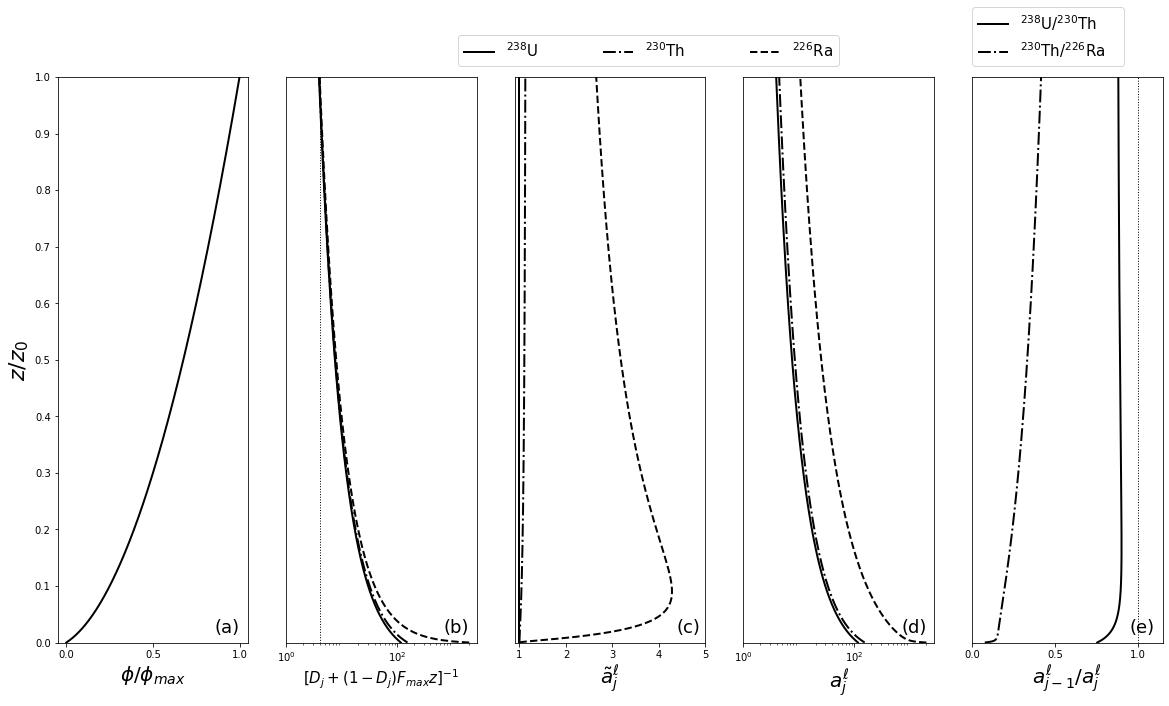

In [13]:
f, ax = plt.subplots(1, 5)
zoom = 2.0
f.set_size_inches(9.9 * zoom, 5.2 * zoom)
f.set_facecolor('w')

lsty = ['-', '-.', '--']

el = [El(0.0086, 1.5e-10, 1.0), El(0.0065, 9.19e-6, 1.0), El(0.0005, 4.33e-4)]
col = Col()
DecayChainColumnSolver(el, col)

ax[0].plot(col.f/col.f[-1], col.z,'-k', linewidth=2)
ax[0].set_ylabel(r'$z/z_0$', fontsize=22)
ax[0].set_xlabel(r'$\phi/\phi_{max}$', fontsize=20)
ax[0].set_ylim(0.0, 1.0)
ax[0].set_xticks((0.0, 0.5, 1.0))
ax[0].set_yticks(np.arange(0.0, 1.01, 0.1))
ax[0].text(1.0, 0.01, '(a)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

for eli, lstyi in zip(el, lsty):
    ax[1].plot(eli.ab, col.z, 'k', linewidth=2, linestyle=lstyi)
ax[1].plot([1./col.Fmax, 1./col.Fmax], [0., 1.], ':k', linewidth=1)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$[D_j + (1-D_j)F_{max}z]^{-1}$', fontsize=15)
ax[1].set_ylim(0.0, 1.0)
ax[1].set_xticks((1e0, 1e2))
ax[1].set_yticks(())
ax[1].text(2e3, 0.01, '(b)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

for eli, lstyi in zip(el, lsty):
    ax[2].plot(eli.a/eli.ab, col.z, 'k', linewidth=2, linestyle=lstyi)
ax[2].set_yticks(())
ax[2].set_xlim(0.9, 5.0)
ax[2].set_ylim(0.0, 1.0)
ax[2].set_xlabel(r'$\tilde{a}_j^\ell$', fontsize=20)
ax[2].text(4.9, 0.01, '(c)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')

p = [ax[3].semilogx(eli.a, col.z, 'k', linewidth=2, linestyle=lstyi) for eli, lstyi in zip(el, lsty)]
ax[3].set_xticks((1e0, 1e2))
ax[3].set_yticks(())
ax[3].set_ylim(0.0, 1.0)
ax[3].set_xlabel(r'$a^\ell_j$', fontsize=20)
ax[3].text(2e3, 0.01, '(d)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')
ax[3].legend(handles=[p_[0] for p_ in p], labels=['$^{238}$U', r'$^{230}$Th', r'$^{226}$Ra'], fontsize=15,
             bbox_to_anchor=(-1.5, 1.02, 2.0, .2),  loc='lower left', ncol=3, mode="expand", borderaxespad=0.)


q = [ax[4].plot(elim.a/eli.a, col.z, 'k', linewidth=2, linestyle=lstyi) 
     for elim, eli, lstyi in zip(el[0:-1], el[1:], lsty[0:-1])]
ax[4].plot([1.0, 1.0], [0.0, 1.0], ':k', linewidth=1)
ax[4].set_xticks((0.0, 0.5, 1.0))
ax[4].set_yticks(())
ax[4].set_xlim(0.0, 1.15)
ax[4].set_ylim(0.0, 1.0)
ax[4].set_xlabel(r'${a}_{j-1}^\ell/{a}_{j}^\ell$', fontsize=20)
ax[4].text(1.1, 0.01, '(e)', fontsize=18, verticalalignment='bottom', horizontalalignment='right')
ax[4].legend(handles=[q_[0] for q_ in q], labels=[r'$^{238}$U$/^{230}$Th', r'$^{230}$Th$/^{226}$Ra'], fontsize=15,
             bbox_to_anchor=(0.0, 1.02, 0.8, .2),  loc='lower left', ncol=1, mode="expand", borderaxespad=0.)

plt.show()

Figures below plot the parameter space diagrams for the column-top daughter-parent activity ratios. Lines are activity-ratio isopleths. Stars represent column-top values from the column shown in Fig. \ref{fig:col-decay-chain-example}. __(a)__ $\isotp{230}{Th}/\isotp{238}{U}$. __(b)__ $\isotp{226}{Ra}/\isotp{230}{Th}$.

In [3]:
class ColTop:
    def __init__(self, N):
        self.a = np.zeros(N*N).reshape(N, N)
        self.ab = np.zeros(N*N).reshape(N, N)

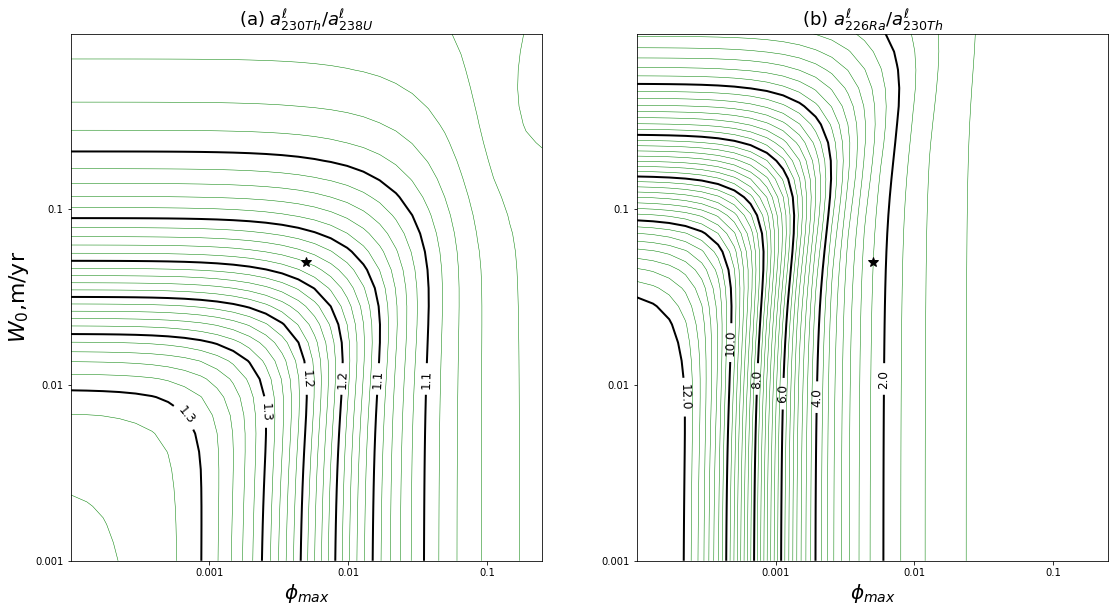

In [28]:
f, ax = plt.subplots(1, 2)
zoom = 2.0
f.set_size_inches(9.3 * zoom, 4.85 * zoom)
f.set_facecolor('w')

el = [El(0.0086, 1.5e-10, 1.0), El(0.0065, 9.19e-6, 1.0), El(0.0005, 4.33e-4)]
col = Col()
DecayChainColumnSolver(el, col)
col.Nz = 10
    
span_fmax = np.log10([1e-4, 0.25])  # porosity
span_W0   = np.log10([1e-3, 1])  # m/yr

Nfmax = 30
NW0   = 30
N = Nfmax*NW0

fmax = np.logspace(span_fmax[0], span_fmax[1], Nfmax)
W0   = np.logspace(span_W0[0], span_W0[1], NW0)

coltop = [ColTop(NW0), ColTop(NW0), ColTop(NW0)]

for j, fmaxj in enumerate(fmax):  # j=1:length(fmax)
    for i, W0i in enumerate(W0):  # =1:length(W0)
        col.W0 = W0i
        col.fmax = fmaxj
        DecayChainColumnSolver(el, col)
        for elk, coltopk in zip(el, coltop):
            coltopk.a[i, j] = elk.a[-1]
            coltopk.ab[i, j] = elk.ab[-1]
    
actratio = coltop[1].a / coltop[0].a
cvec = np.arange(1.0, 2.005, 0.01)
cvec = np.setdiff1d(cvec, cvec[5:-1:5])
cs = ax[0].contour(np.log10(fmax), np.log10(W0), actratio, cvec, colors='g', linewidths=0.5)
cvec = np.arange(1.05, 2.01, 0.05)
cs = ax[0].contour(np.log10(fmax), np.log10(W0), actratio, cvec, colors='k', linewidths=2)
ax[0].clabel(cs, inline=1, fontsize=12, fmt="%1.1f")
ax[0].plot(np.log10(0.005), np.log10(0.05), '*k', markersize=10)
ax[0].set_xticks([-3.0, -2.0, -1.0])
ax[0].set_xticklabels([1e-3, 1e-2, 1e-1])
ax[0].set_yticks([-3.0, -2.0, -1.0])
ax[0].set_yticklabels([1e-3, 1e-2, 1e-1])
ax[0].set_xlabel(r'$\phi_{max}$', fontsize=20)
ax[0].set_ylabel(r'$W_0$,m/yr', fontsize=22)
ax[0].set_title(r'(a) $a^\ell_{230Th}/a^\ell_{238U}$', fontsize=18)

actratio = coltop[2].a / coltop[1].a
cvec = np.arange(1.0, 12.1, 0.25)
cvec = np.setdiff1d(cvec, cvec[4::8])
cs = ax[1].contour(np.log10(fmax), np.log10(W0), actratio, cvec, colors='g', linewidths=0.5)
cvec = np.arange(2.0, 12.1, 2.0)
cs = ax[1].contour(np.log10(fmax), np.log10(W0), actratio, cvec, colors='k', linewidths=2)
ax[1].clabel(cs, inline=1, fontsize=12, fmt="%1.1f")
ax[1].plot(np.log10(0.005), np.log10(0.05), '*k', markersize=10)
ax[1].set_xticks([-3.0, -2.0, -1.0])
ax[1].set_xticklabels([1e-3, 1e-2, 1e-1])
ax[1].set_yticks([-3.0, -2.0, -1.0])
ax[1].set_yticklabels([1e-3, 1e-2, 1e-1])
ax[1].set_xlabel(r'$\phi_{max}$', fontsize=20)
ax[1].set_title(r'(b) $a^\ell_{226Ra}/a^\ell_{230Th}$', fontsize=18)

plt.show()